In [205]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, make_scorer, f1_score,precision_score,recall_score, plot_confusion_matrix

ModuleNotFoundError: No module named 'keras'

In [191]:
def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / len(arr)
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

In [192]:
def taste(quality):
  if quality <= 5:
    return 0
  elif quality == 6:
    return 1
  else:
    return 2

In [193]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [194]:
new_data = data
new_data["taste"] = data["quality"].apply(taste)

In [195]:
new_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2


## Divisão de base de dados e separação de base

In [196]:
X = new_data.iloc[:, 0:11].values
y = new_data.iloc[:, 12].values

In [197]:
print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 36.69%
Classe 1: 43.65%
Classe 2: 19.66%


Fold 0
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 1
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 2
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%
Fold 3
Classe 0: 36.69%
Classe 1: 43.66%
Classe 2: 19.65%


Fold 4
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 5
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 6
Classe 0: 36.70%
Classe 1: 43.65%
Classe 2: 19.65%


Fold 7
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%


Fold 8
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%


Fold 9
Classe 0: 36.70%
Classe 1: 43.64%
Classe 2: 19.66%




In [198]:
kf_accuracy = list()
kf_conf_mat = list()
kf_precision = list()
kf_f1 = list()
kf_recall = list()
kf_roc = list()

## Laço para execução do gridsearch em cada fold 

In [199]:
for train_ix, test_ix in kf.split(X,y):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = KNeighborsClassifier()
    # parâmetros para teste do gridsearch
    parameters = dict()
    parameters["n_neighbors"] = list(range(1, 12, 2))
    parameters["weights"] = ["uniform", "distance"]
    parameters["metric"] = ["euclidean", "manhattan"]
    search = GridSearchCV(model, parameters, scoring="accuracy", cv=10, refit=True)
    # executar e salvar melhores parâmetros do grisearch
    result = search.fit(X_train, y_train)
    best_model = result.best_estimator_
    # teste dos melhores parâmetros
    predicted_y = best_model.predict(X_test)
    #transformação de itens para cálculo do ROC
    y_test_dummy = np_utils.to_categorical(y_test)
    y_test_dummy
    predicted_y_dummy = np_utils.to_categorical(predicted_y)
    predicted_y_dummy
    # métricas do modelo
    acc = accuracy_score(y_test, predicted_y)
    conf_mat = confusion_matrix(y_test, predicted_y)
    f1 = f1_score(y_test, predicted_y, average = "macro")
    recall = recall_score(y_test, predicted_y, average = "macro")
    roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = "macro")
    #armazenamento de métricas
    kf_accuracy.append(acc)
    kf_conf_mat.append(conf_mat)
    kf_f1.append(f1)
    kf_recall.append(recall)
    kf_roc.append(roc)
    #métricas
    print(">acc=%.3f,>f1=%.3f,>rec=%.3f,>roc=%.3f, est=%.3f, cfg=%s" % (acc,f1,recall,roc, result.best_score_, result.best_params_))
    print(conf_mat)

>acc=0.675, >prec=0.678, >f1=0.665, >rec=0.656, est=0.463, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[167  65   7]
 [ 55 200  28]
 [ 11  45  72]]
>acc=0.668, >prec=0.654, >f1=0.652, >rec=0.650, est=0.460, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[180  50   9]
 [ 58 184  41]
 [ 11  47  70]]
>acc=0.668, >prec=0.667, >f1=0.665, >rec=0.662, est=0.463, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[164  65  10]
 [ 62 189  32]
 [ 13  34  81]]
>acc=0.642, >prec=0.636, >f1=0.627, >rec=0.621, est=0.468, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[151  76  12]
 [ 51 198  34]
 [ 18  42  68]]
>acc=0.623, >prec=0.623, >f1=0.609, >rec=0.600, est=0.464, cfg={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
[[154  75   9]
 [ 64 188  32]
 [ 12  53  63]]
>acc=0.665, >prec=0.667, >f1=0.656, >rec=0.648, est=0.459, cfg={'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance

In [200]:
print("Accuracy: %.3f (%.3f)" % (np.mean(kf_accuracy), np.std(kf_accuracy)))
print("F1-score: %.3f (%.3f)" % (np.mean(kf_f1), np.std(kf_f1)))
print("Recall: %.3f (%.3f)" % (np.mean(kf_recall), np.std(kf_recall)))
print("ROC: %.3f (%.3f)" % (np.mean(kf_roc), np.std(kf_roc)))

Accuracy: 0.654 (0.017)
Precision: 0.654 (0.018)
F1-score: 0.644 (0.018)
Recall: 0.638 (0.019)


In [201]:
kf_conf_mat

[array([[167,  65,   7],
        [ 55, 200,  28],
        [ 11,  45,  72]], dtype=int64),
 array([[180,  50,   9],
        [ 58, 184,  41],
        [ 11,  47,  70]], dtype=int64),
 array([[164,  65,  10],
        [ 62, 189,  32],
        [ 13,  34,  81]], dtype=int64),
 array([[151,  76,  12],
        [ 51, 198,  34],
        [ 18,  42,  68]], dtype=int64),
 array([[154,  75,   9],
        [ 64, 188,  32],
        [ 12,  53,  63]], dtype=int64),
 array([[167,  63,   8],
        [ 64, 193,  27],
        [ 14,  42,  72]], dtype=int64),
 array([[158,  62,  18],
        [ 61, 187,  36],
        [ 11,  41,  76]], dtype=int64),
 array([[170,  60,   8],
        [ 67, 195,  22],
        [ 12,  44,  71]], dtype=int64),
 array([[142,  86,  10],
        [ 60, 200,  24],
        [ 19,  32,  76]], dtype=int64),
 array([[148,  80,  10],
        [ 65, 196,  23],
        [ 16,  43,  68]], dtype=int64)]

In [202]:
conf_mat_mean = np.mean(kf_conf_mat,axis=0)

Confusion matrix, without normalization
[[160.1  68.2  10.1]
 [ 60.7 193.   29.9]
 [ 13.7  42.3  71.7]]


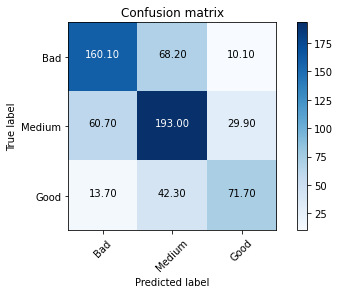

In [203]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(conf_mat_mean,["Bad","Medium","Good"])